# Notebook of the Procom project : Learning physics informed mappings for turbulence multiscale decomposition

**Authors :** Paul Fouilhac, Mouhamed Sow, Éloi Sainte Beuve, Ghazi Abid

In [1]:
pip install -Uq pytorch-lightning lpips

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\kinbr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Parameters

In [4]:
# Data parameters
nb_images = 500 # Maximum = 500
val_size = 0.2
test_size = 0.2
batch_size = 4

# Training parameters
num_training_epochs = 20#1250
pretrained = False
num_pretrained_epochs = 0

## Loading data

In [5]:
from turbulence.dataset import load_data

image_folder_path = './velocity_images'
train_loader, val_loader, test_loader = load_data(image_folder_path, nb_images, val_size, test_size, batch_size)

## Training

In [ ]:
from turbulence.train import train

pretrained_model_path = f'./turbulence/pretrained/turbulence_epoch_{num_pretrained_epochs}.ckpt'
train(pretrained_model_path, train_loader, val_loader, epochs=num_training_epochs, pretrained=pretrained)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, u

Loading model from: C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lpips\weights\v0.1\alex.pth
No pre-trained model found. Training from scratch.
Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 3:   0%|          | 0/80 [00:00<?, ?it/s, v_num=6]         

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000027D70D4B880>
Traceback (most recent call last):
  File "C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\data\dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "C:\Users\kinbr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\utils\data\dataloader.py", line 1627, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\popen_spawn_win32.py", 

Epoch 3:  31%|███▏      | 25/80 [03:52<08:30,  0.11it/s, v_num=6] 


Detected KeyboardInterrupt, attempting graceful shutdown ...


## Testing

In [8]:
# Load the trained model

from turbulence.network import Turbulence
from turbulence.utils import load_model

model = Turbulence()
trained_model_path = './turbulence/pretrained/best_model.pth'
load_model(model, trained_model_path)

model.eval()  # Set the model to evaluation mode
batch = next(iter(test_loader))

### Plotting the reconstruction

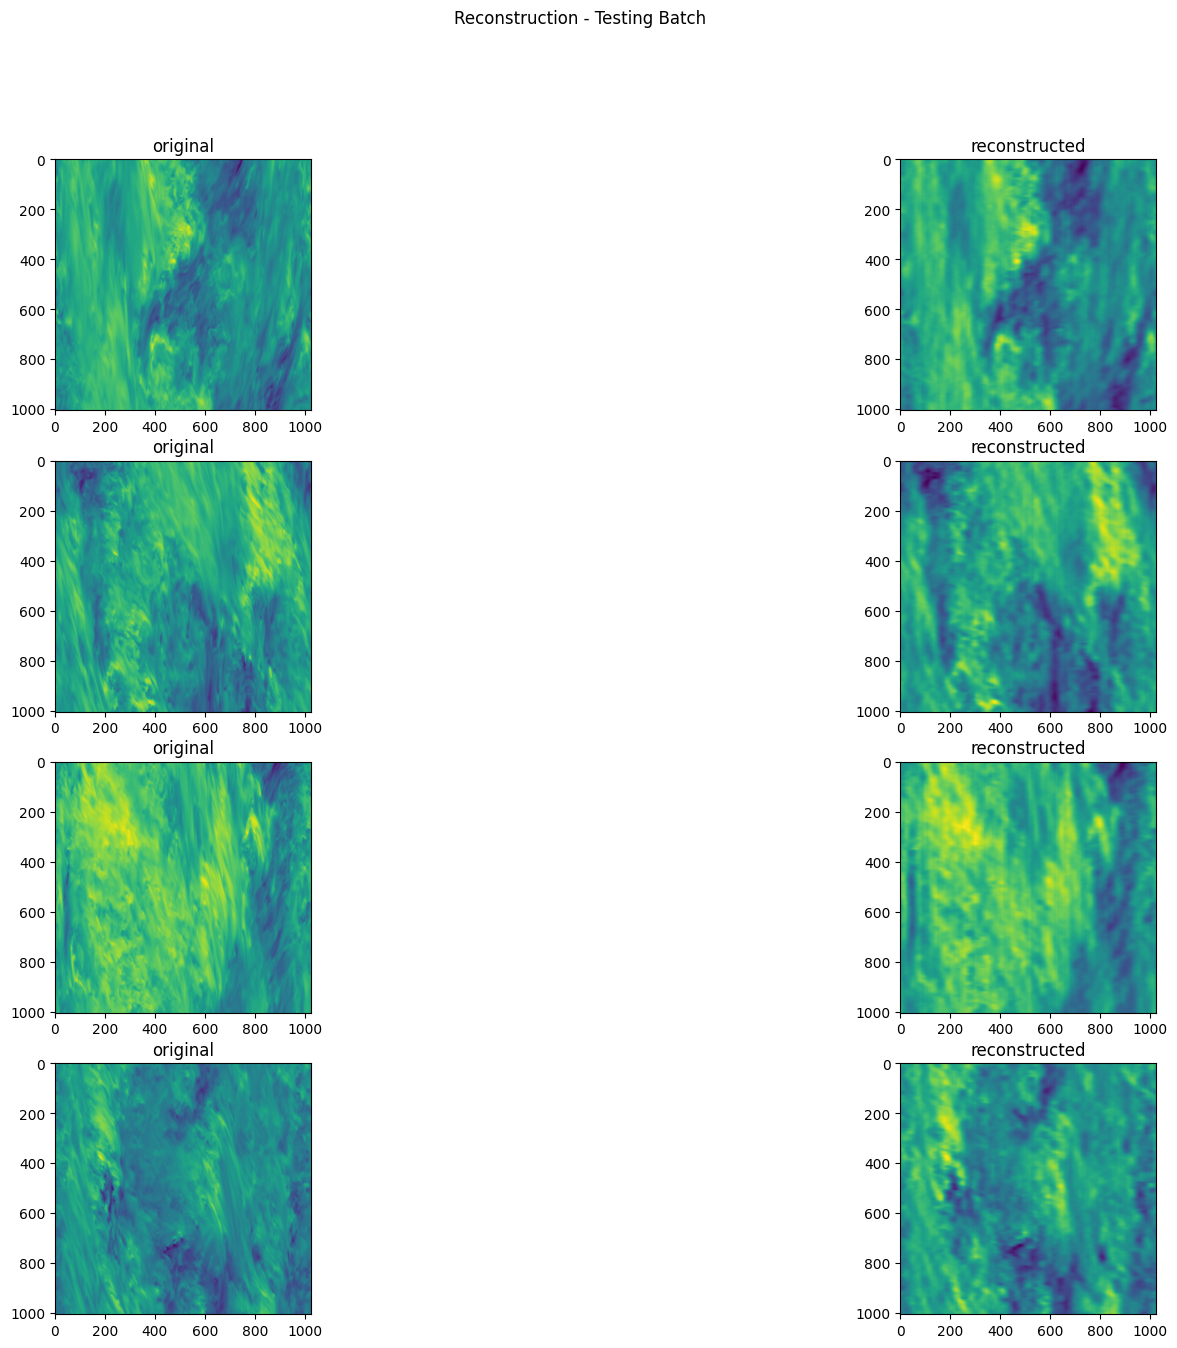

In [9]:
from turbulence.utils import plot_reconstruction

plot_reconstruction(model, batch)

### Plot the sepctrums

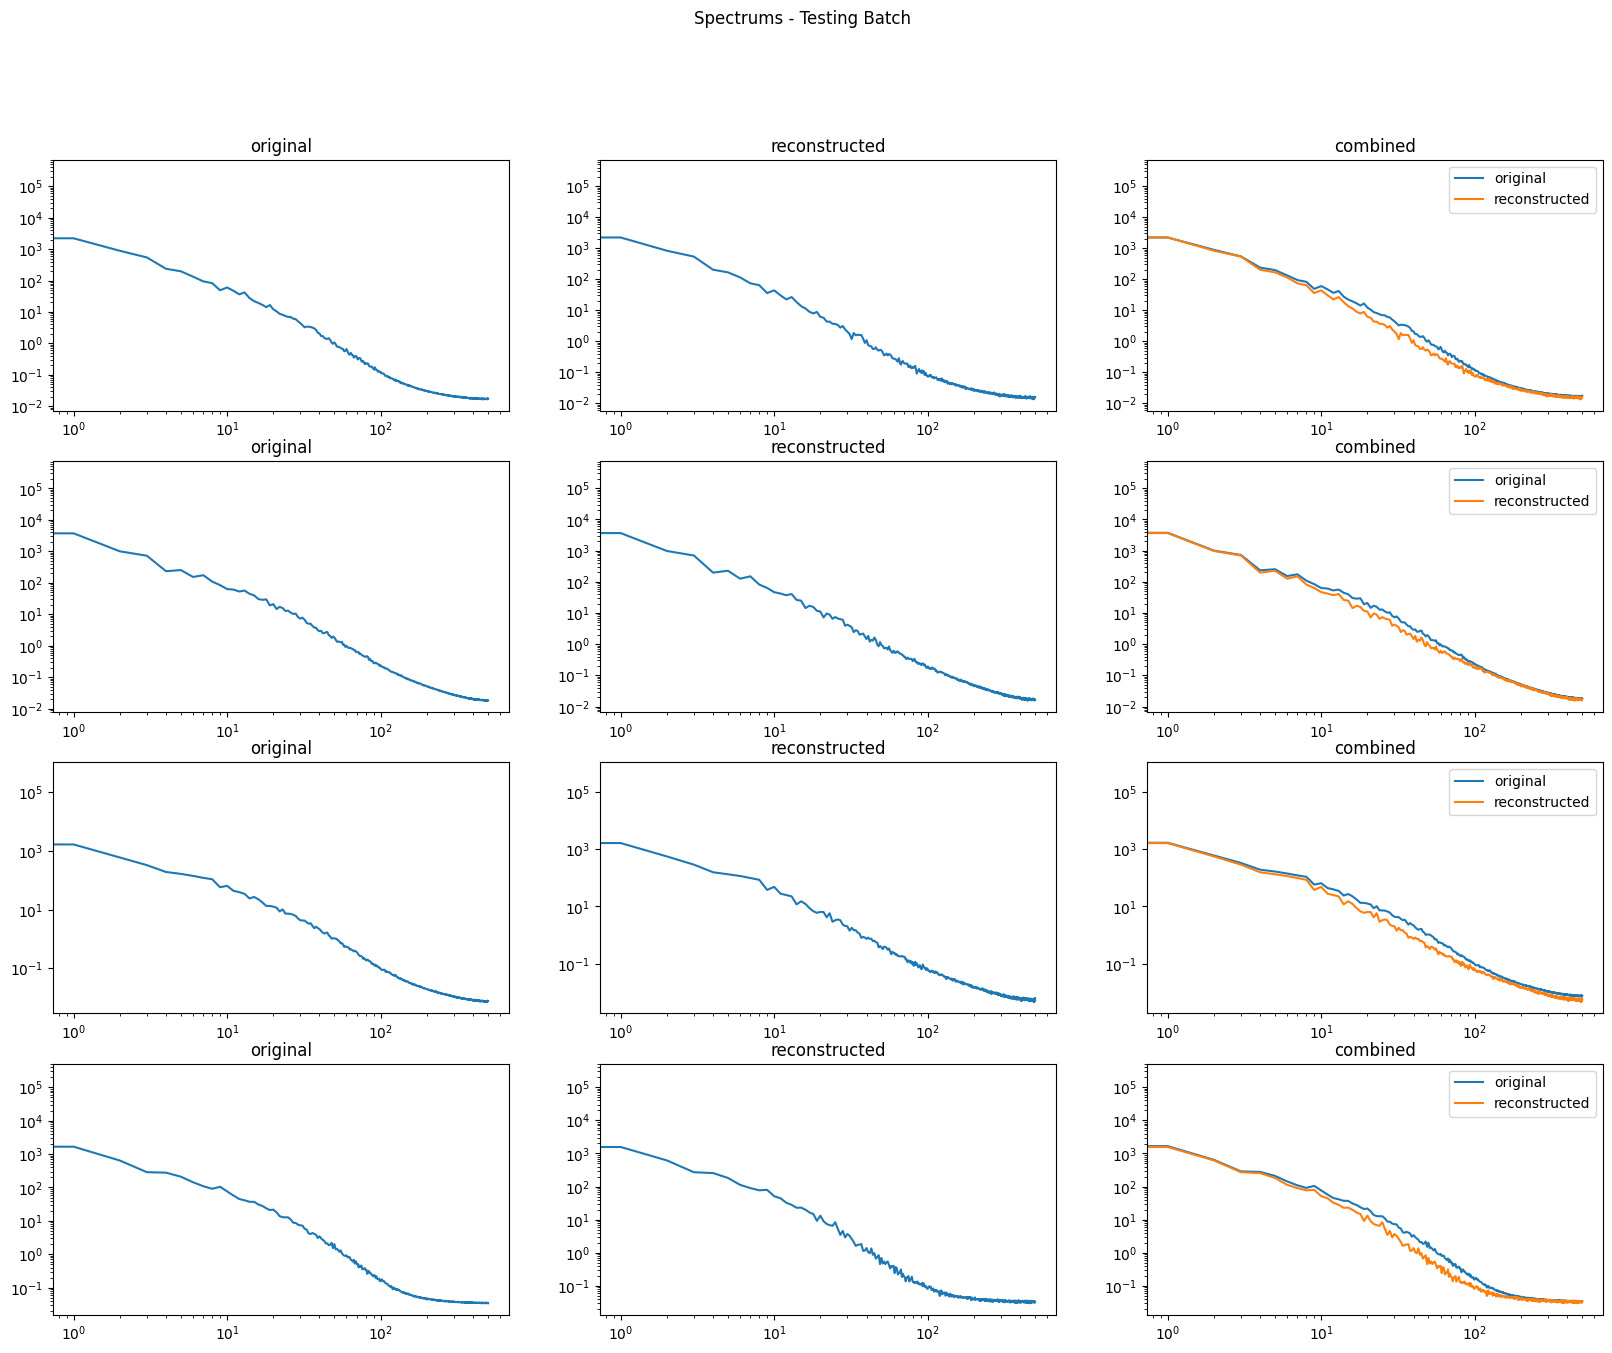

In [10]:
from turbulence.utils import plot_spectrums

plot_spectrums(model, batch)

### Plot the latent space modes amplitude

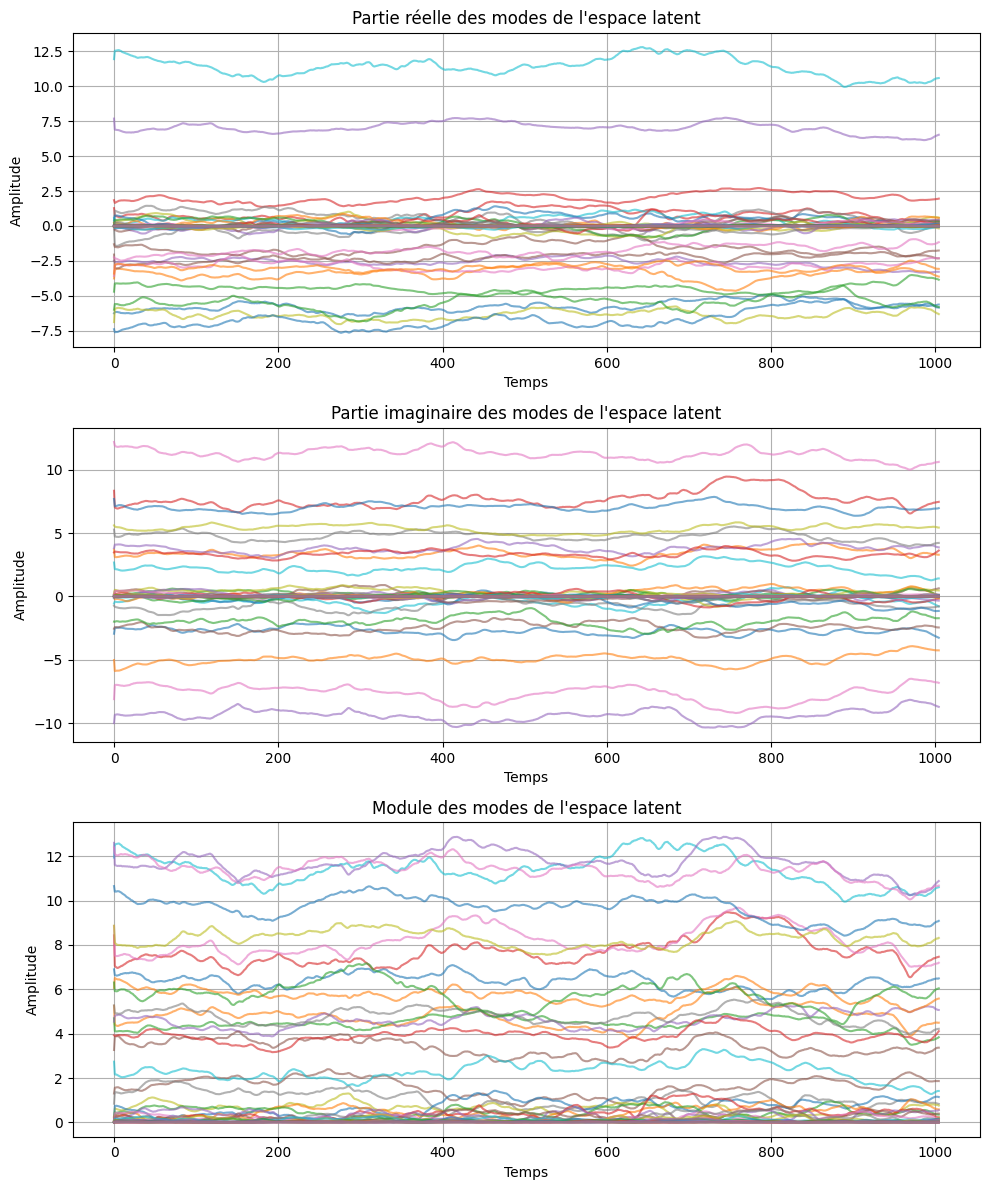

In [11]:
from turbulence.utils import plot_latent_space_mode_amplitude

image = batch[0] # Set the image
plot_latent_space_mode_amplitude(model, image)

### Plot the flatness of the latent space modes

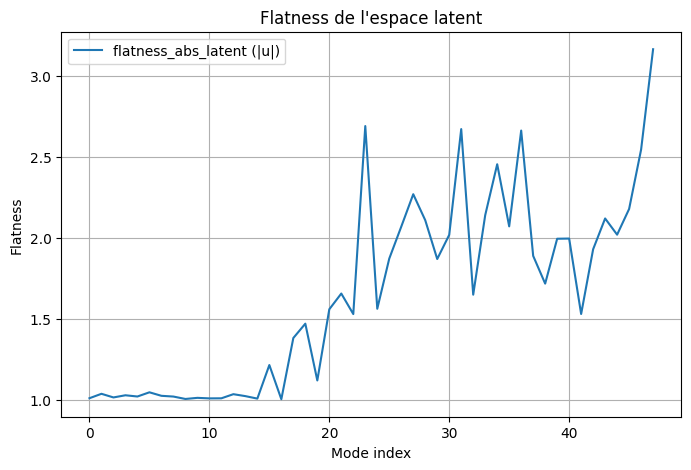

In [12]:
from turbulence.utils import plot_flatness

image = batch[0] # Set the image
plot_flatness(model, image)